In [1]:
#this is implementation of paper with title 
#Image Quality Assessment for Image Filtering Algorithm: Qualitative and Quantitative Analyses
#this test only use 2 images

#name: Yusuf Gladiensyah Bihanda
#NRP: 6025222011

In [60]:
#import library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

(256, 256, 3)
(510, 510, 3)


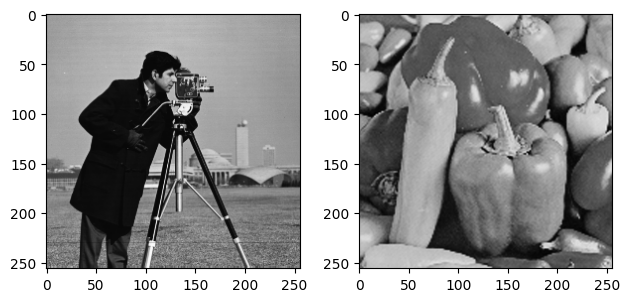

In [84]:
#load sample image 1 
sample_img_1 = cv.imread('sample_1.png')
print(sample_img_1.shape)

#load sample image 2
sample_img_2 = cv.imread('sample_2.png')
print(sample_img_2.shape)
sample_img_2 = cv.resize(sample_img_2, (256,256))

#show image
plt.rcParams["figure.autolayout"] = True
plt.subplot(1,2,1)
plt.imshow(sample_img_1)
plt.subplot(1,2,2)
plt.imshow(sample_img_2)

In [4]:
#add noise function
def add_salt_pepper(img, density=0.01):
    random_noise = np.random.rand(img.shape[0], img.shape[1])
    output = img.copy()
    output[random_noise < density] = 0
    output[random_noise > 1 - density] = 255
    return output

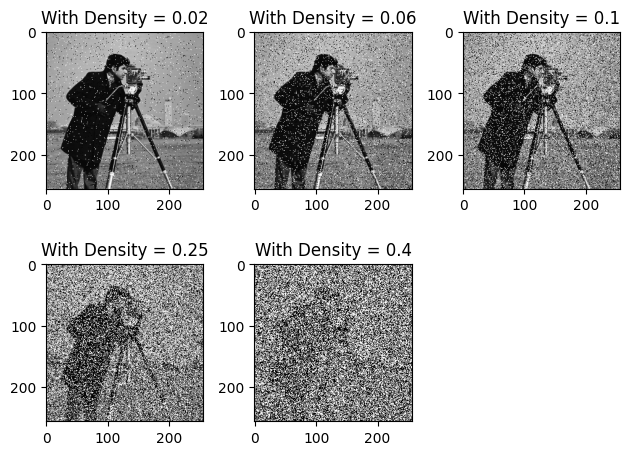

In [5]:
#add noise to first image (from density 0.02, 0.06, 0.1, 0.25, 0.4)
cameraman_img_1 = add_salt_pepper(sample_img_1, 0.02)
cameraman_img_2 = add_salt_pepper(sample_img_1, 0.06)
cameraman_img_3 = add_salt_pepper(sample_img_1, 0.1)
cameraman_img_4 = add_salt_pepper(sample_img_1, 0.25)
cameraman_img_5 = add_salt_pepper(sample_img_1, 0.4)

#show first image with noise
plt.rcParams["figure.autolayout"] = True
plt.subplot(2,3,1)
plt.title("With Density = 0.02")
plt.imshow(cameraman_img_1)
plt.subplot(2,3,2)
plt.title("With Density = 0.06")
plt.imshow(cameraman_img_2)
plt.subplot(2,3,3)
plt.title("With Density = 0.1")
plt.imshow(cameraman_img_3)
plt.subplot(2,3,4)
plt.title("With Density = 0.25")
plt.imshow(cameraman_img_4)
plt.subplot(2,3,5)
plt.title("With Density = 0.4")
plt.imshow(cameraman_img_5)

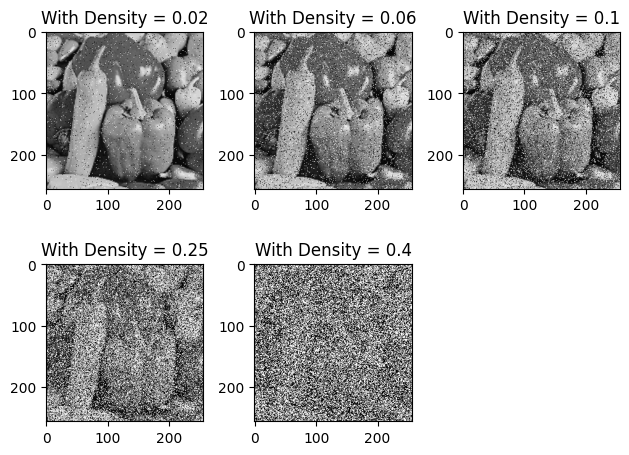

In [6]:
#add noise to second image (from density 0.02, 0.06, 0.1, 0.25, 0.4)
fruit_img_1 = add_salt_pepper(sample_img_2, 0.02)
fruit_img_2 = add_salt_pepper(sample_img_2, 0.06)
fruit_img_3 = add_salt_pepper(sample_img_2, 0.1)
fruit_img_4 = add_salt_pepper(sample_img_2, 0.25)
fruit_img_5 = add_salt_pepper(sample_img_2, 0.4)

#show second image with noise
plt.rcParams["figure.autolayout"] = True
plt.subplot(2,3,1)
plt.title("With Density = 0.02")
plt.imshow(fruit_img_1)
plt.subplot(2,3,2)
plt.title("With Density = 0.06")
plt.imshow(fruit_img_2)
plt.subplot(2,3,3)
plt.title("With Density = 0.1")
plt.imshow(fruit_img_3)
plt.subplot(2,3,4)
plt.title("With Density = 0.25")
plt.imshow(fruit_img_4)
plt.subplot(2,3,5)
plt.title("With Density = 0.4")
plt.imshow(fruit_img_5)

In [134]:
#for removing noise with 3 filter (gaussian, median, and wiener) we try to use first image
#define function for gaussian, median, and wiener

def gaussian_filter(img, kernel=3,sigma=85):
    new_gauss_img = cv.GaussianBlur(img, (kernel, kernel), sigma)
    return new_gauss_img

def median_filter(img, kernel=3):
    new_median_img = cv.medianBlur(img, kernel)
    return new_median_img

def wiener_filter(img, K_const=200):
    dft = np.fft.fft2(img)
    pspec = (np.abs(dft))**2 / np.prod(img.shape)
    filter = np.conj(pspec)/(pspec + K_const)
    filter = filter * dft
    new_wiener_img = np.fft.ifft2(filter)
    new_wiener_img = np.real(new_wiener_img)
    new_wiener_img = new_wiener_img.clip(0,255).astype(np.uint8)
    return new_wiener_img

# def wiener_filter(img, K = 10):
#     psd = np.abs(np.fft.fft2(img)) ** 2 / np.prod(img.shape)
#     filter = np.conj(psd) / (np.abs(psd)**2 + K)
#     new_wiener_img = np.real(np.fft.ifft2(np.fft.fft2(img) * filter))
#     return new_wiener_img

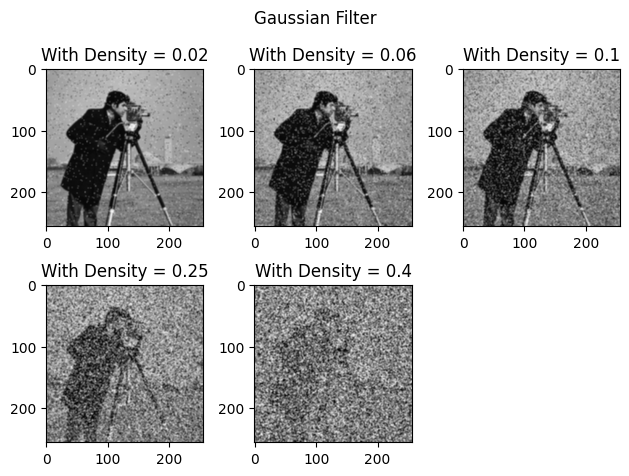

In [8]:
#lets look the result for gaussian
gauss_res_1 = gaussian_filter(cameraman_img_1)
gauss_res_2 = gaussian_filter(cameraman_img_2)
gauss_res_3 = gaussian_filter(cameraman_img_3)
gauss_res_4 = gaussian_filter(cameraman_img_4)
gauss_res_5 = gaussian_filter(cameraman_img_5)

#show image with gaussian filter
plt.rcParams["figure.autolayout"] = True
plt.suptitle("Gaussian Filter")
plt.subplot(2,3,1)
plt.title("With Density = 0.02")
plt.imshow(gauss_res_1)
plt.subplot(2,3,2)
plt.title("With Density = 0.06")
plt.imshow(gauss_res_2)
plt.subplot(2,3,3)
plt.title("With Density = 0.1")
plt.imshow(gauss_res_3)
plt.subplot(2,3,4)
plt.title("With Density = 0.25")
plt.imshow(gauss_res_4)
plt.subplot(2,3,5)
plt.title("With Density = 0.4")
plt.imshow(gauss_res_5)

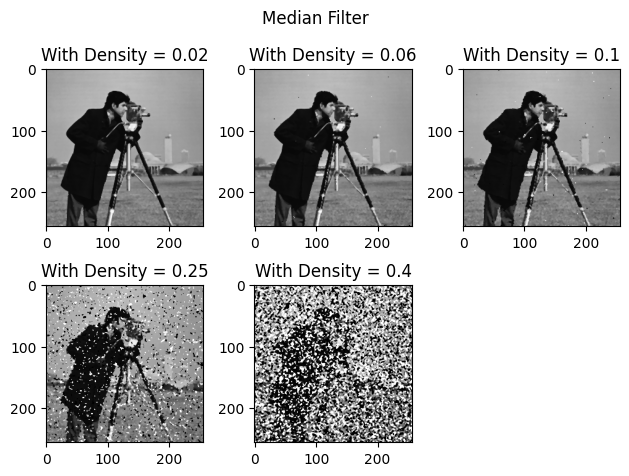

In [9]:
#lets look the result for median
median_res_1 = median_filter(cameraman_img_1)
median_res_2 = median_filter(cameraman_img_2)
median_res_3 = median_filter(cameraman_img_3)
median_res_4 = median_filter(cameraman_img_4)
median_res_5 = median_filter(cameraman_img_5)

#show image with median filter
plt.rcParams["figure.autolayout"] = True
plt.suptitle("Median Filter")
plt.subplot(2,3,1)
plt.title("With Density = 0.02")
plt.imshow(median_res_1)
plt.subplot(2,3,2)
plt.title("With Density = 0.06")
plt.imshow(median_res_2)
plt.subplot(2,3,3)
plt.title("With Density = 0.1")
plt.imshow(median_res_3)
plt.subplot(2,3,4)
plt.title("With Density = 0.25")
plt.imshow(median_res_4)
plt.subplot(2,3,5)
plt.title("With Density = 0.4")
plt.imshow(median_res_5)

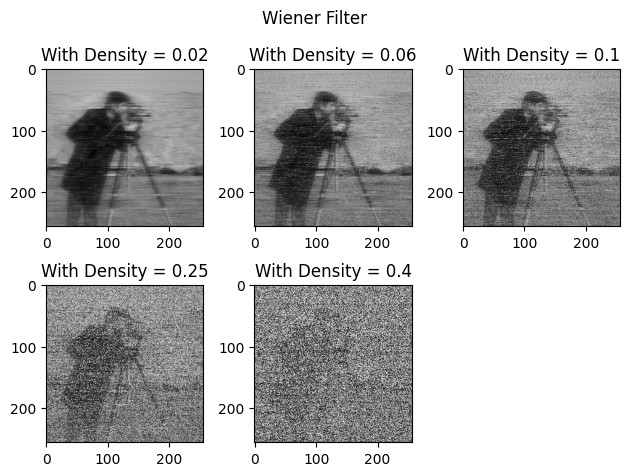

In [135]:
#try using wiener filter
wiener_res_1 = wiener_filter(cameraman_img_1)
wiener_res_2 = wiener_filter(cameraman_img_2)
wiener_res_3 = wiener_filter(cameraman_img_3)
wiener_res_4 = wiener_filter(cameraman_img_4)
wiener_res_5 = wiener_filter(cameraman_img_5)

#show image with median filter
plt.rcParams["figure.autolayout"] = True
plt.suptitle("Wiener Filter")
plt.subplot(2,3,1)
plt.title("With Density = 0.02")
plt.imshow(wiener_res_1)
plt.subplot(2,3,2)
plt.title("With Density = 0.06")
plt.imshow(wiener_res_2)
plt.subplot(2,3,3)
plt.title("With Density = 0.1")
plt.imshow(wiener_res_3)
plt.subplot(2,3,4)
plt.title("With Density = 0.25")
plt.imshow(wiener_res_4)
plt.subplot(2,3,5)
plt.title("With Density = 0.4")
plt.imshow(wiener_res_5)

In [13]:
#define peak signal to noise ratio (psnr) and mean square error (mse) metrics
def mse(noisy_img, filtered_img):
    diff = (noisy_img - filtered_img) ** 2
    sum_diff = np.sum(diff)
    num_pixel = float(noisy_img.shape[0] * noisy_img.shape[1])
    error_res = sum_diff / num_pixel
    return round(error_res, 2)

def psnr(noisy_img, filtered_img):
    mse_result = mse(noisy_img, filtered_img)
    if mse_result == 0:
        return 100
    return round(20 * np.log10(255./np.sqrt(mse_result)), 2)

In [136]:
#show value of mse from each filter
mse_table = PrettyTable()
mse_table.title = "Perhitungan MSE Gambar Cameraman"
mse_table.field_names = ['Type of Filter', 'Density = 0.02', 'Density = 0.06', 'Density = 0.1', 'Density = 0.25', 'Density = 0.4']
mse_table.add_row(['Gaussian Filter', mse(cameraman_img_1, gauss_res_1),mse(cameraman_img_2, gauss_res_2),mse(cameraman_img_3, gauss_res_3),mse(cameraman_img_4, gauss_res_4),mse(cameraman_img_5, gauss_res_5)])
mse_table.add_row(['Median Filter', mse(cameraman_img_1, median_res_1),mse(cameraman_img_2, median_res_2),mse(cameraman_img_3, median_res_3),mse(cameraman_img_4, median_res_4),mse(cameraman_img_5, median_res_5)])
mse_table.add_row(['Wiener Filter', mse(cameraman_img_1, wiener_res_1),mse(cameraman_img_2, wiener_res_2),mse(cameraman_img_3, wiener_res_3),mse(cameraman_img_4, wiener_res_4),mse(cameraman_img_5, wiener_res_5)])
print(mse_table)

+----------------------------------------------------------------------------------------------------+
|                                  Perhitungan MSE Gambar Cameraman                                  |
+-----------------+----------------+----------------+---------------+----------------+---------------+
|  Type of Filter | Density = 0.02 | Density = 0.06 | Density = 0.1 | Density = 0.25 | Density = 0.4 |
+-----------------+----------------+----------------+---------------+----------------+---------------+
| Gaussian Filter |     151.18     |     228.19     |     268.8     |     304.33     |     327.43    |
|  Median Filter  |     71.65      |     95.17      |     119.72    |     185.64     |     145.98    |
|  Wiener Filter  |     242.07     |     267.76     |     282.72    |     320.78     |     336.39    |
+-----------------+----------------+----------------+---------------+----------------+---------------+


In [137]:
#show value of psnr from each filter
psnr_table = PrettyTable()
psnr_table.title = "Perhitungan PSNR Gambar Cameraman (dalam dB)"
psnr_table.field_names = ['Type of Filter', 'Density = 0.02', 'Density = 0.06', 'Density = 0.1', 'Density = 0.25', 'Density = 0.4']
psnr_table.add_row(['Gaussian Filter', psnr(cameraman_img_1, gauss_res_1),psnr(cameraman_img_2, gauss_res_2),psnr(cameraman_img_3, gauss_res_3),psnr(cameraman_img_4, gauss_res_4),psnr(cameraman_img_5, gauss_res_5)])
psnr_table.add_row(['Median Filter', psnr(cameraman_img_1, median_res_1),psnr(cameraman_img_2, median_res_2),psnr(cameraman_img_3, median_res_3),psnr(cameraman_img_4, median_res_4),psnr(cameraman_img_5, median_res_5)])
psnr_table.add_row(['Wiener Filter', psnr(cameraman_img_1, wiener_res_1),psnr(cameraman_img_2, wiener_res_2),psnr(cameraman_img_3, wiener_res_3),psnr(cameraman_img_4, wiener_res_4),psnr(cameraman_img_5, wiener_res_5)])
print(psnr_table)

+----------------------------------------------------------------------------------------------------+
|                            Perhitungan PSNR Gambar Cameraman (dalam dB)                            |
+-----------------+----------------+----------------+---------------+----------------+---------------+
|  Type of Filter | Density = 0.02 | Density = 0.06 | Density = 0.1 | Density = 0.25 | Density = 0.4 |
+-----------------+----------------+----------------+---------------+----------------+---------------+
| Gaussian Filter |     26.34      |     24.55      |     23.84     |      23.3      |     22.98     |
|  Median Filter  |     29.58      |     28.35      |     27.35     |     25.44      |     26.49     |
|  Wiener Filter  |     24.29      |     23.85      |     23.62     |     23.07      |     22.86     |
+-----------------+----------------+----------------+---------------+----------------+---------------+


**Conclusion**
**Filter Paling Baik untuk salt & pepper adalah median filter**